# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import t, norm

%matplotlib inline

In [58]:
data = pd.io.stata.read_stata(r'C:\Users\lakshya_hanshvik\Desktop\sb\assingment_statistics\EDA_racial_discrimination\data/us_job_market_discrimination.dta')

In [59]:
# number of callbacks for black-sounding names
sum(data[data.race=='w'].call)

235.0

In [60]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


<div class="span5 alert alert-success">
<p>Your answers to Q1 and Q2 here</p>
</div>

In [61]:
df = data
data = data[['race', 'call']]
data.head()

,race,call
0,w,0.0
1,w,0.0
2,b,0.0
3,b,0.0
4,w,0.0


In [62]:
w = data[data.race=='w']  # white sounding names
b = data[data.race=='b']  #black sounding names

In [63]:
w_prob = round((sum(w.call) / len(w)) , 3)
b_prob = round((sum(b.call) / len(b)) , 3)
total_prob = round(sum(data.call) / len(data) ,3)
prob_diff = w_prob - b_prob

print("Probability of callbacks for white-sounding names = {}".format(w_prob))
print("Probability of callbacks for black-sounding names = {}".format(b_prob))
print("Probability of total callbacks for black+white sounding names = {}".format(total_percent))
prob_diff

Probability of callbacks for white-sounding names = 0.097
Probability of callbacks for black-sounding names = 0.064
Probability of total callbacks for black+white sounding names = 0.08


0.033

In [64]:
data.describe()

,call
count,4870.000000
mean,0.080493
std,0.272079
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


# 1. What test is appropriate for this problem? Does CLT apply?

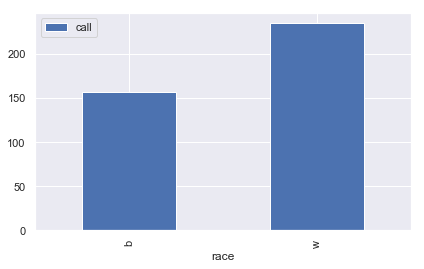

In [65]:
calls= data.groupby('race').sum()
calls.plot(kind ='bar')

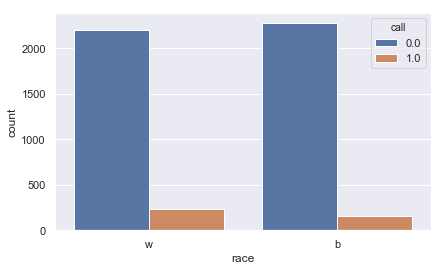

In [66]:

#checking distribution
sns.set()
sns.countplot(x='race',hue='call',data=data)
plt.show()

From the data we are interested in the 'call' and the 'race' columns 

---> In order for the result of the CLT to hold, the sample must be sufficiently large (n > 30). Again, there are two exceptions to this. If the population is normal, then the result holds for samples of any size (i..e, the sampling distribution of the sample means will be approximately normal even for samples of size less than 30).

-->Observations are independent .

---> Suppose we measure a characteristic like 'call' in a population and that is binomial( success(1) or failure(0) ) The Central Limit Theorem applies even to binomial populations like this. 

Conclusion: CLT will apply to this data

We're looking  at two different groups(w/b) and see whether the distributions of those groups for a certain variable(call) are similar or not. For such data we can use Chi-square test
conditions for chi-square test

---> observations are independent                
---> Expected value should be atleast 5 ( in our case w : 235 ,b:157)                
---> sampels should be random



In [67]:
#defining Empirical Cumulative Distribution Function to plot sample cumulative distribution vs. the theoretical normal

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

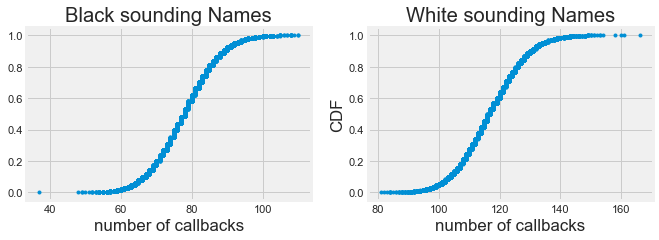

In [68]:
w_samples = np.random.binomial( n=len(w),p=w_percent,size=10000)
b_samples = np.random.binomial( n=len(b),p=b_percent,size=10000)

x_w,y_w = ecdf(w_samples)
x_b,y_b = ecdf(b_samples)

_ = plt.figure(figsize=(10,7))
_ = plt.style.use('fivethirtyeight')

plt.subplot(2,2,1)
_ = plt.plot(x_b,y_b ,marker='.',linestyle='none')
_ = plt.xlabel('number of callbacks')
_ = plt.title('Black sounding Names')

plt.subplot(2,2,2)

_ = plt.plot(x_w,y_w ,marker='.',linestyle='none')
_ = plt.xlabel('number of callbacks')
_ = plt.ylabel('CDF')
_ = plt.title('White sounding Names')


#   2. What are the null and alternate hypotheses?

Null hypothesis : The probability of getting a callback is the same for both resumes with white-sounding names and black-sounding names.              
                    w_prob = b_prob

Alternate Hypothesis: the probability of getting a callback IS NOT THE SAME for resumes with white-sounding names as it is for those with black-sounding names.
                    w_prob != b_prob


# 3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.

In [69]:
#draw bs replicates func
def draw_bs_reps(Data):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(10000)
    
    # Generate replicates
    for i in range(10000):
        n = np.random.choice(Data, size=len(Data))
        n = sum(n)/len(n)
        bs_replicates[i] = n
    return bs_replicates

In [70]:
# Bootstrapping approach 

#95% confidence interval
w_prob = round((sum(w.call) / len(w)) , 3)
b_prob = round((sum(b.call) / len(b)) , 3)
total_prob = round(sum(data.call) / len(data) ,3)
prob_diff = w_prob - b_prob

prop_call = sum(data.call) / len(data.call)
print('Total proportion of callbacks: ', prop_call)

w_shifted = w.call - w_prob + total_prob
b_shifted = b.call - b_prob + total_prob

w_bs_replicates = draw_bs_reps(w_shifted)
b_bs_replicates = draw_bs_reps(b_shifted)

bs_replicates = w_bs_replicates - b_bs_replicates

p_value = np.sum(bs_replicates == prob_diff) / 10000
print("P-value: {}" .format(round(p_value,3)))

print("95% confidence interval is {}".format(np.percentile(bs_replicates,[2.5,97.5])))

Total proportion of callbacks:  0.08049281314168377
P-value: 0.0
95% confidence interval is [-0.0165729   0.01422792]


# The test procedure, called the two-proportion z-test, is appropriate when the following conditions are met:

The sampling method for each population is simple random sampling.
Its a Normal distribution.              
The samples are independent.                   
Each sample includes at least 10 successes and 10 failures.                  
Each population is at least 20 times as big as its sample.            

This approach consists of four steps:            
(1) state the hypotheses, (2) formulate an analysis plan, (3) analyze sample data, and (4) interpret results.


significance level  (alpha) = 0.05                    

sample proportion (P) = (w_prob * len(w)) + (b_prob * len(b)) / (len(w) + len(b))      

standard error (SE) = sqrt{ P * ( 1 - P ) * [ (1/(len(w) + (1/len(b) ] }      

Z = (w_prob - b_prob) / SE

95 % Confidence Interval  =  (prob_diff) +/- np.sqrt(( (w_prob * (1-w_prob))/ len(w) )  + ( (b_prob * (1-b_prob))/ len(b) ))

In [71]:
#Test statistic in a two-sample z test for the difference of proportions

w_prob = round((sum(w.call) / len(w)) , 3)
b_prob = round((sum(b.call) / len(b)) , 3)
total_prob = round(sum(data.call) / len(data) ,3)
prob_diff = w_prob - b_prob

P = ((w_prob * len(w)) + (b_prob * len(b))) / (len(w) + len(b))

SE = np.sqrt(P * ( 1 - P ) * ( (1/len(w)) + (1/len(b)) ))

Z = (w_prob - b_prob) / SE

p_value = stats.norm.sf(abs(Z))*2 

c_high= (prob_diff) + np.sqrt(( (w_prob * (1-w_prob))/ len(w) )  + ( (b_prob * (1-b_prob))/ len(b) ))
c_low= (prob_diff) - np.sqrt(( (w_prob * (1-w_prob))/ len(w) )  + ( (b_prob * (1-b_prob))/ len(b) ))


P  ,SE ,Z ,p_value  ,c_high ,c2 

print(" margin of error = {} ".format(SE))
print(" pvalue = {} ".format(p_value))
print(" 95% confidence interval if from {}  to {} ".format(round(c_low,3),round(c_high,3)))

 margin of error = 0.007797211632387978 
 pvalue = 2.3133189385323067e-05 
 95% confidence interval if from 0.025  to 0.041 


Q4. Write a story describing the statistical significance in the context or the original problem.
Q5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

The p-value from the Frequentist and Boostrap approaches are both below the alpha(0.05) so the null hypothesis must be  rejected.
we can conclude that race has an effect on the number of call backs.


It has been proven that the number of callbacks received for resumes with white-sounding names is significantly and higher than the proportion of callbacks for resumes with black-sounding names. 